# Exercise Sheet 08: Softmax Regression

## Exercise 8.2

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.sparse
from sklearn.model_selection import train_test_split
from tqdm import tqdm

def oneHot(Y):
    m = Y.shape[0]
    OHy = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHy = np.array(OHy.todense()).T
    return OHy

def softmax(z):
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

In [74]:
# TODO: Implement softmax regression. Regularization is optional.

class SoftmaxRegression(object):
    
    def __init__(self):
        self.W = None
        
    def fit(self,X,y):
        
        X, X_val, y, y_val = train_test_split(X, y,test_size=0.2,
                                              random_state=21)
        
        self.W = np.zeros([X.shape[1],len(np.unique(y))])
        lam = 1
        iterations = 200
        learningRate = 1e-5
        
        LOSS_TRAIN = []
        LOSS_EVAL  = []
        
        for i in tqdm(range(iterations)):
            loss,grad = self.loss(X,y,lam)
            LOSS_TRAIN.append(loss)
            lossval,gradval = self.loss(X_val,y_val,lam)
            LOSS_EVAL.append(lossval)
    
            self.W = self.W - (learningRate * grad)
        
        return LOSS_TRAIN, LOSS_EVAL
        
        
    def loss(self, X, y, lam):
        m = X.shape[0]
        y_mat = oneHot(y)
        scores = X@self.W
        h = softmax(scores)
        loss = (-1 / m) * np.sum(y_mat * np.log(h)) + (lam/2)*np.sum(self.W*self.W)
        grad = (-1 / m) * X.T @(y_mat - h) + lam*self.W
        return loss, grad
        
    def predict(self, X):
        H = softmax(X@self.W)
        return np.argmax(H,axis=1)
        
    def evaluate(self, X, y):
        prediction = self.predict(X)
        acc = sum(prediction == y) / float(len(y))
        return acc
    

## Exercise 8.3

In [72]:
def load_mnist(path):
    """ Load data from mnist dataset stored in csv format. 
        Rows correspond to examples.
        First column are the labels, all other columns constitute the data.
        Each image is 28 x 28 stored as 784-dim. vector.
        Input: 
            path      path to csv file
            classes   list of classes to extract
        Output:
            data      design matrix holding the images
            labels    array of corresponding labels
    
    """
    df = pd.read_csv(path, header=None)
    labels = np.array(df.iloc[:,0])
    data = np.array(df.iloc[:,1:])
    return data,labels

def plot_mnist(x):
    """ Plot an mnist image.
        Input:
            x      784-dim. vector representing a grayscale image of size 28 x 28.
    """
    img = np.reshape(x,(28,28))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img,cmap='gray')
    #plt.show()

X_test, y_test = load_mnist('mnist_test.csv')
X_train, y_train = load_mnist('mnist_train.csv')

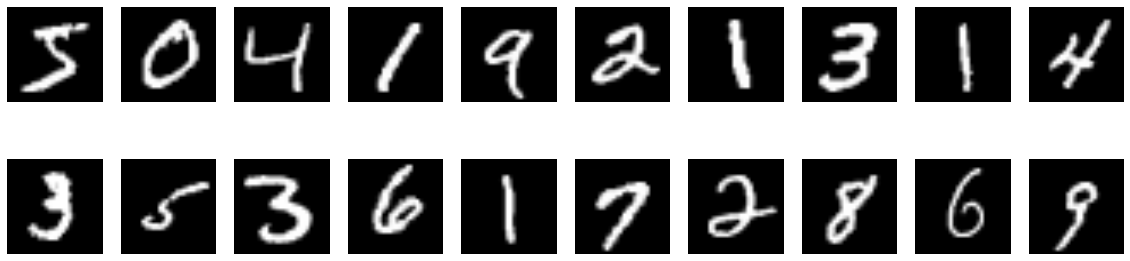

In [73]:
plt.figure(figsize=(20,5))
for i in range(20):
    plt.subplot(2,10,i+1)
    plot_mnist(X_train[i])

In [75]:
classifier = SoftmaxRegression()

LOSS_TRAIN, LOSS_EVAL = classifier.fit(X_train,y_train)

acc_test = classifier.evaluate(X_test,y_test)
acc_train = classifier.evaluate(X_train,y_train)
print('Test Accuracy =',acc_test)
print('Train Accuracy =',acc_train)

100%|██████████| 200/200 [03:11<00:00,  1.09it/s]


Test Accuracy = 0.9118
Train Accuracy = 0.90675


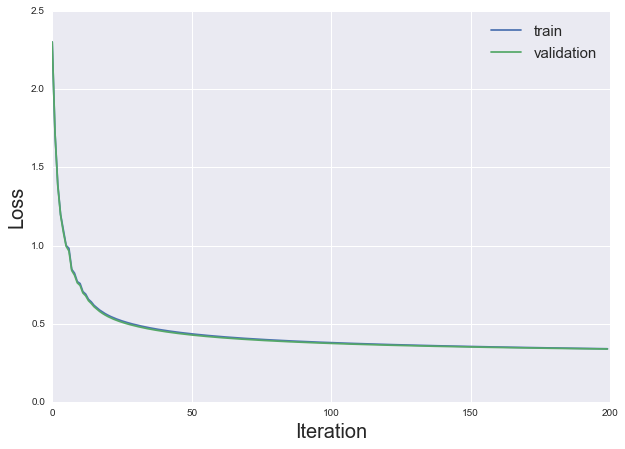

In [76]:
# TODO: plot both loss curves
plt.figure(figsize=(10,7))
plt.plot(LOSS_TRAIN, label='train')
plt.plot(LOSS_EVAL,label='validation')
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.legend(fontsize=15)

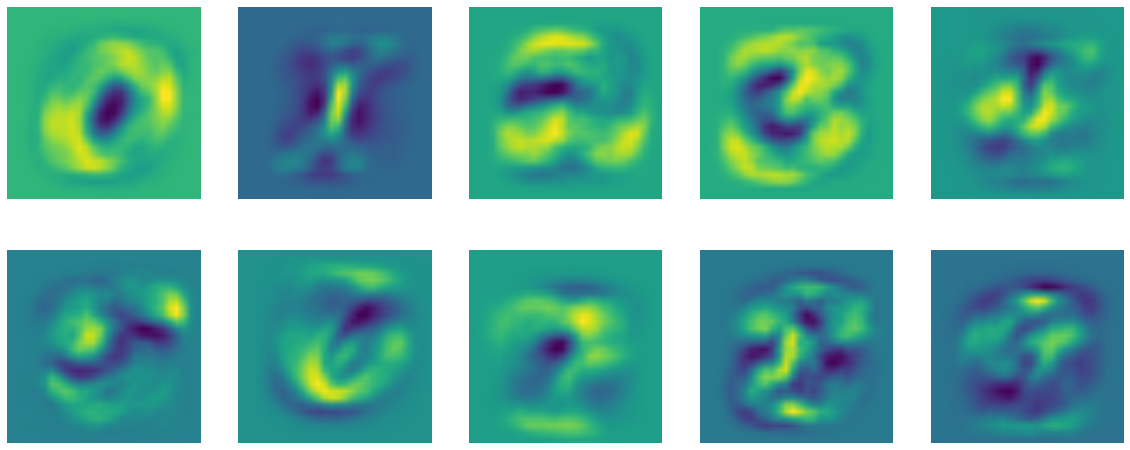

In [78]:
# visualize weights
weights = classifier.W
plt.figure(figsize=(20,8))
for n in range(10):
  plt.subplot(2,5,n+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(scipy.reshape(weights[:,n],[28,28]),cmap='viridis')